# Жиделев Сергей 
# 7 лабораторная работа
# РИ-401002

In [2]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


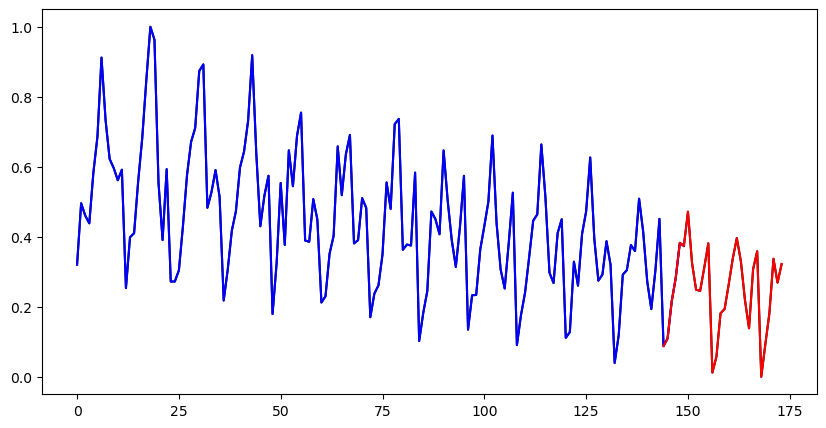

In [3]:
file = h5py.File('Data/Fort.mat', 'r')
data = file.get('Fort')
Fort = np.array(data)
F = np.ravel(Fort)
F = F.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
F = scaler.fit_transform(F)
F_tr = F[:150]
F_test = F[144:]
plt.figure(figsize = (10, 5))
plt.plot(F, 'k')
plt.plot(np.r_[:150],F_tr, 'b')
plt.plot(np.r_[144:174],F_test, 'r')
plt.show()

In [4]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
data_gen = TimeseriesGenerator(F_tr, F_tr,
 length=6, sampling_rate=1,
 batch_size=150)
batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) # 144 точки обучения, прогноз 1 точки по 6 прошлым
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape) #

(144, 6, 1)
(144, 1, 6)
(144, 1)


In [5]:
model = Sequential() # слои соединены последовательно
model.add(LSTM(units=20, input_shape=(1, 6))) # 20 нейронов
model.add(Dense(units = 1)) # выход одномерный
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


C:\anacond\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model = Sequential()
model.add(LSTM(units=20, return_sequences=True, input_shape=(1, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=20, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=20))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [7]:
model.fit(xx, yy, epochs = 100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.2110
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2127 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2021 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1840 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1642 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1491 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1282 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1142 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0972 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0846 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0662 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0509 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0354 
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0394 
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0368 
Epoch 16/100
5/5 ━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step


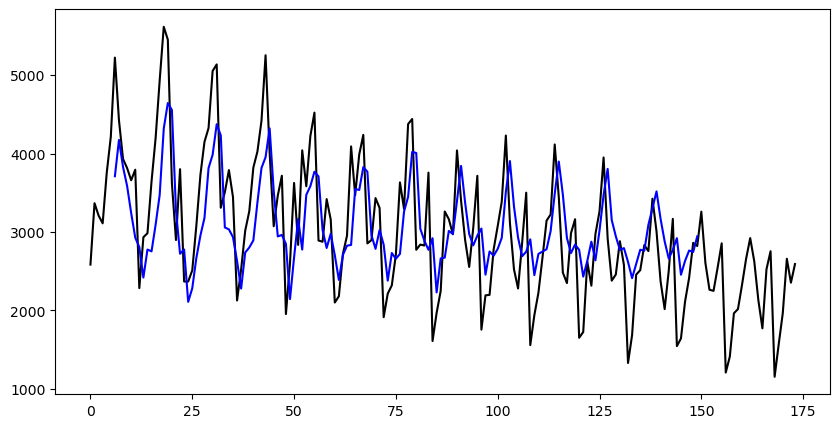

In [8]:
trainPredict = model.predict(xx)
trainPredict = scaler.inverse_transform(trainPredict)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.plot(np.r_[6:150],trainPredict, 'b')
plt.show()

In [9]:
data_gen = TimeseriesGenerator(F_test, F_test,
 length=6, sampling_rate=1,
 batch_size=150)
batch_0 = data_gen[0]
x, y = batch_0
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy = y
print(xx.shape) # прогноз на 24 точки по 6 наблюдениям
print(yy.shape) 

(24, 1, 6)
(24, 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


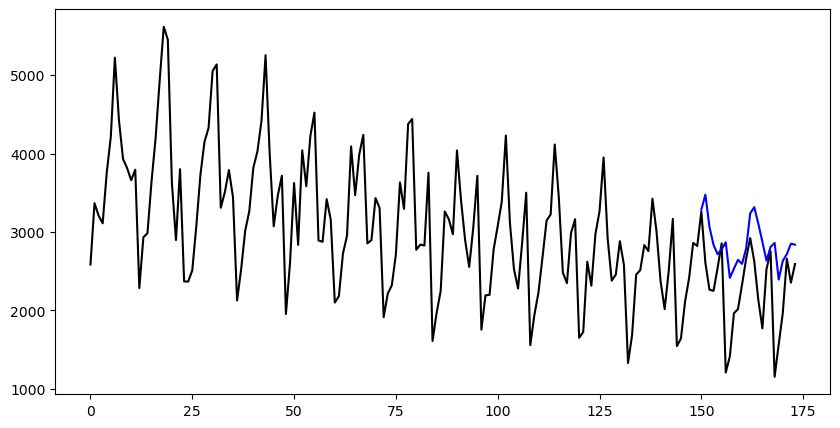

In [10]:
testPredict = model.predict(xx)
testPredict = scaler.inverse_transform(testPredict)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.plot(np.r_[150:174],testPredict, 'b')
plt.show()

In [11]:
F_tr = F[:174]
F_test = F[130:]

10 задание

In [12]:
data_gen = TimeseriesGenerator(F_tr, F_tr,
 length=20, sampling_rate=1,
 batch_size=150)
batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) # 144 точки обучения, прогноз 1 точки по 6 прошлым
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape) #

m = 30

model = Sequential()
model.add(LSTM(units=m, return_sequences=True, input_shape=(1, 20)))
model.add(Dropout(0.15))
model.add(LSTM(units=m, return_sequences=True))
model.add(Dropout(0.15))
model.add(LSTM(units=m))
model.add(Dropout(0.15))
model.add(Dense(units = 2))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')



(150, 20, 1)
(150, 1, 20)
(150, 1)


C:\anacond\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.fit(xx, yy, epochs = 200)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.1976
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1700 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1759 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1393 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1471 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1134 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0914 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0851 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0475 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0298 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0282 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0340 
Epoch 13/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0286 
Epoch 14/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0268 
Epoch 15/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0305 
Epoch 16/200
5/5 ━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 368ms/step


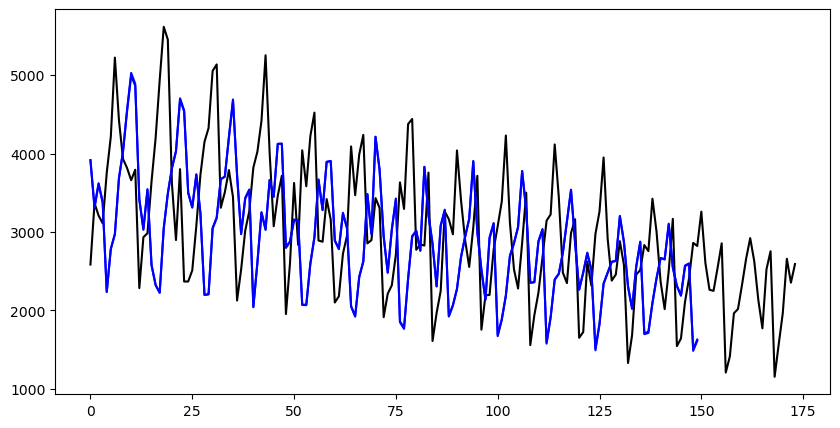

In [14]:
trainPredict = model.predict(xx)
trainPredict = scaler.inverse_transform(trainPredict)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.plot(np.r_[:150], trainPredict, 'b')
plt.show()

In [15]:
data_gen = TimeseriesGenerator(F_test, F_test,
 length=20, sampling_rate=1,
 batch_size=150)
batch_0 = data_gen[0]
x, y = batch_0
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy = y
print(xx.shape) # прогноз на 24 точки по 6 наблюдениям
print(yy.shape) 

(24, 1, 20)
(24, 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


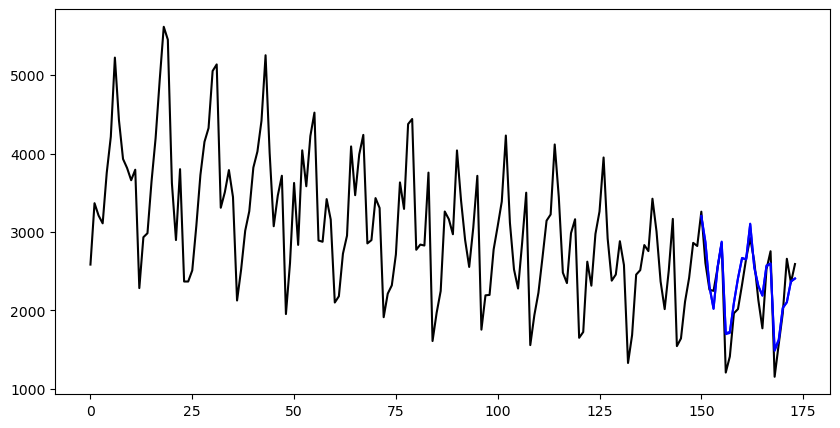

In [16]:
testPredict = model.predict(xx)
testPredict = scaler.inverse_transform(testPredict)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.plot(np.r_[150:174],testPredict, 'b')
plt.show()

11 задание

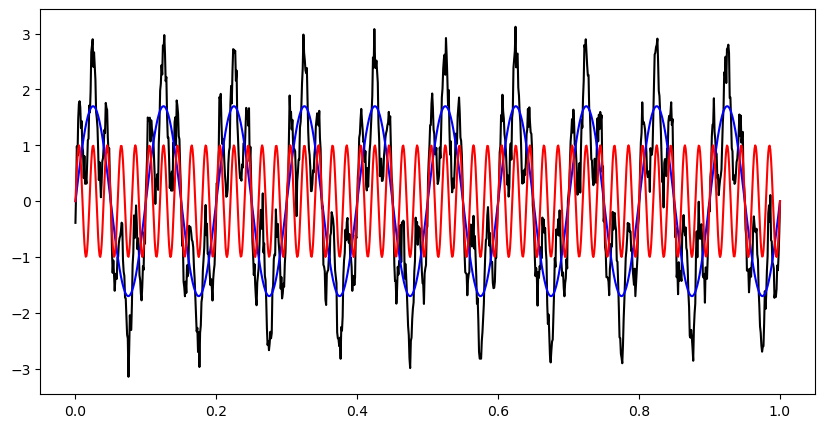

In [17]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50
F=1.7*np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, 1.7*np.sin(2*np.pi*f1*t), 'b')
plt.plot(t, np.sin(2*np.pi*f2*t), 'r')
plt.show()


In [18]:
F_tr, F_test = F[:len(F)-226].reshape(-1, 1), F[len(F)-286:].reshape(-1, 1)

data_gen = TimeseriesGenerator(F_tr, F_tr,
 length=30, sampling_rate=1,
 batch_size=len(F_tr))

batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) # 144 точки обучения, прогноз 1 точки по 6 прошлым
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape) #

m = 100

model = Sequential()
model.add(LSTM(units=m, return_sequences=True, input_shape=(1, 30)))
model.add(Dropout(0.3))
model.add(LSTM(units=m, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=m))
model.add(Dropout(0.4))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

(768, 30, 1)
(768, 1, 30)
(768, 1)


C:\anacond\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.fit(xx, yy, epochs = 200)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1.9091
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5773
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1365
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1209
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1047
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0841
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0855
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0807
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0850
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0789
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0808
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0914 
Epoch 13/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0716
Epoch 14/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0861
Epoch 15/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0806
Ep

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


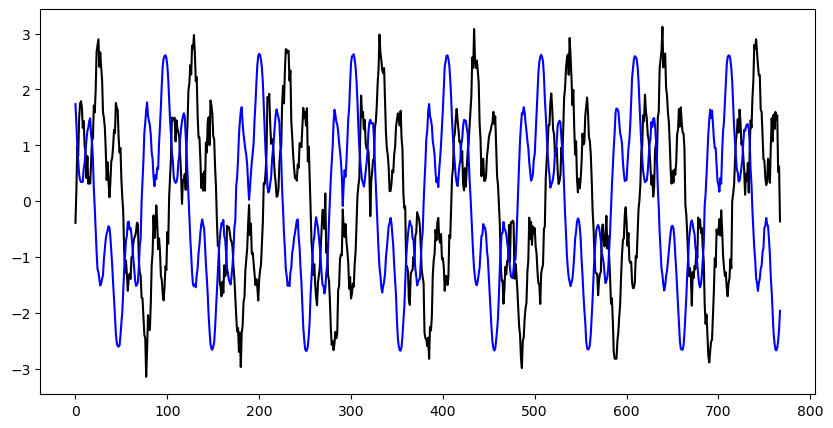

In [20]:
trainPredict = model.predict(xx)
plt.figure(figsize = (10, 5))
plt.plot(F[:768], 'k')
plt.plot(np.r_[:768], trainPredict, 'b')
plt.show()

In [21]:
data_gen = TimeseriesGenerator(F_test, F_test,
 length=30, sampling_rate=1,
 batch_size=len(F))
batch_0 = data_gen[0]
x, y = batch_0
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy = y
print(xx.shape) # прогноз на 24 точки по 6 наблюдениям
print(yy.shape) 

(256, 1, 30)
(256, 1)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


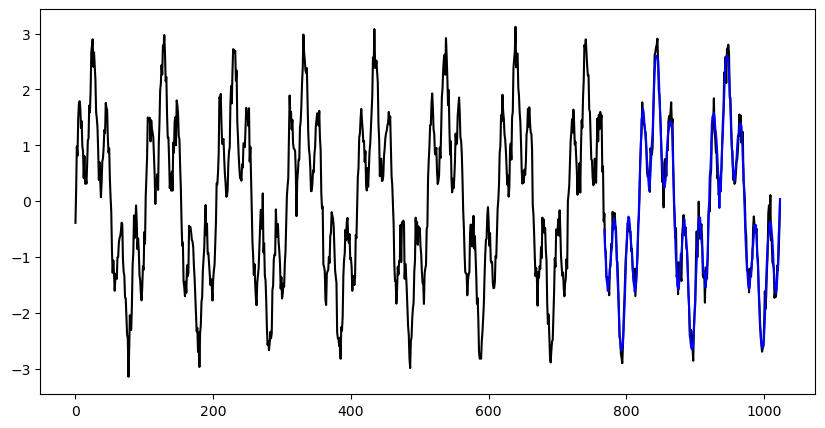

In [22]:
testPredict = model.predict(xx)
plt.figure(figsize = (10, 5))
plt.plot(F, 'k')
plt.plot(np.r_[768:1024], testPredict, 'b')
plt.show()

12 задание

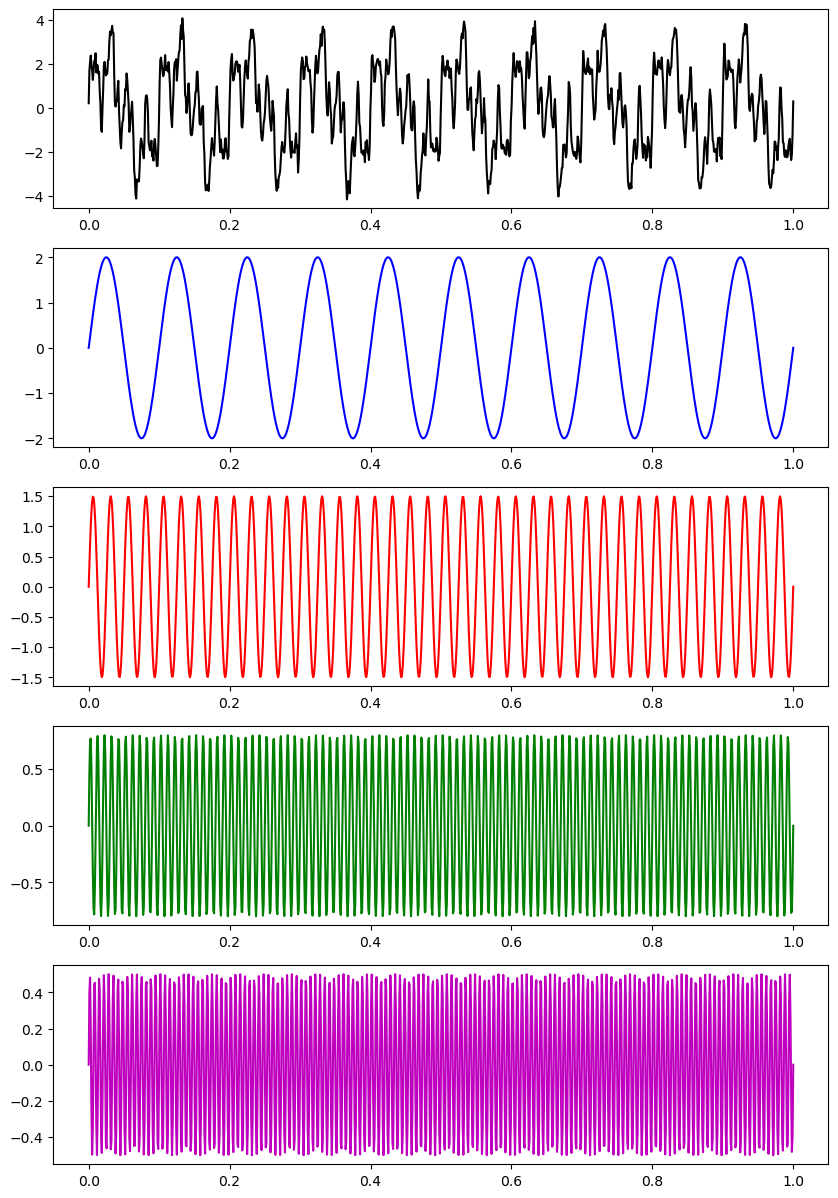

In [23]:
t = np.linspace(0,1,1024)
f1 = 10
f2 = 40
f3 = 100
f4 = 150
F=2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t)+0.8*np.sin(2*np.pi*f3
*t)+0.5*np.sin(2*np.pi*f4*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 15))
plt.subplot(5,1,1)
plt.plot(t, F, 'k')
plt.subplot(5,1,2)
plt.plot(t, 2.0*np.sin(2*np.pi*f1*t), 'b')
plt.subplot(5,1,3)
plt.plot(t, 1.5*np.sin(2*np.pi*f2*t), 'r')
plt.subplot(5,1,4)
plt.plot(t, 0.8*np.sin(2*np.pi*f3*t), 'g')
plt.subplot(5,1,5)
plt.plot(t, 0.5*np.sin(2*np.pi*f4*t), 'm')
plt.show()

In [24]:
F=2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t)+0.8*np.sin(2*np.pi*f3
*t)+0.5*np.sin(2*np.pi*f4*t)

In [35]:
F_tr, F_test = F[:len(F)-226].reshape(-1, 1), F[len(F)-286:].reshape(-1, 1)

data_gen = TimeseriesGenerator(F_tr, F_tr,
 length=30, sampling_rate=1,
 batch_size=len(F_tr))

batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) # 144 точки обучения, прогноз 1 точки по 6 прошлым
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape) #

m = 100

model = Sequential()
model.add(LSTM(units=m, return_sequences=True, input_shape=(1, 30)))
model.add(Dropout(0.3))
model.add(LSTM(units=m, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=m))
model.add(Dropout(0.4))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

(768, 30, 1)
(768, 1, 30)
(768, 1)


In [36]:
model.fit(xx, yy, epochs = 200)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 3.5308
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9859
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3973
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1327
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1007
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1017
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0938
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0938
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1042
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0950
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0966
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0893
Epoch 13/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0749
Epoch 14/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0691
Epoch 15/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0772
Epoc

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


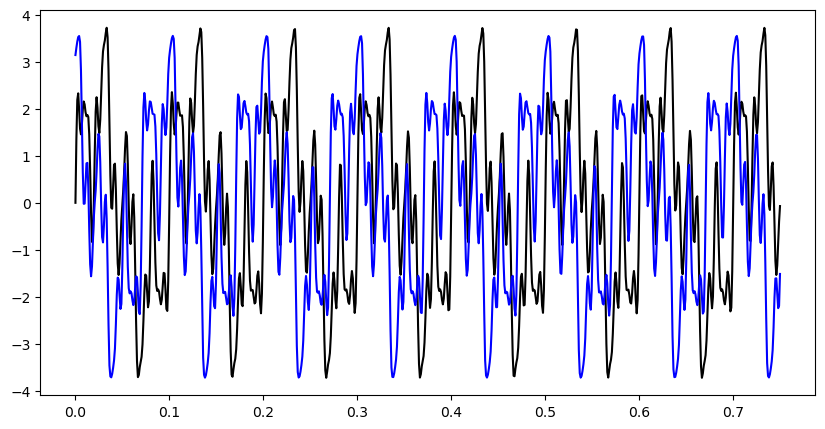

In [37]:
trainPredict = model.predict(xx)
plt.figure(figsize = (10, 5))
plt.plot(t[:768], F[:768], 'k')
plt.plot(t[:768], trainPredict, 'b')
plt.show()

In [38]:
data_gen = TimeseriesGenerator(F_test, F_test,
 length=30, sampling_rate=1,
 batch_size=len(F))
batch_0 = data_gen[0]
x, y = batch_0
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy = y
print(xx.shape) # прогноз на 24 точки по 6 наблюдениям
print(yy.shape) 

(256, 1, 30)
(256, 1)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


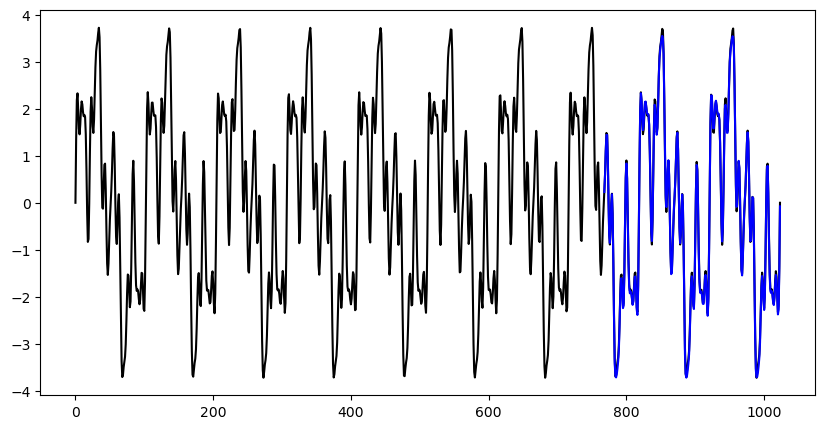

In [39]:
testPredict = model.predict(xx)
plt.figure(figsize = (10, 5))
plt.plot(F, 'k')
plt.plot(np.r_[768:1024], testPredict, 'b')
plt.show()